In [ ]:
#MULTIMAP env

#Python == 3.8.17
#Anndata == 0.9.1
#Scanpy == 1.9.3
#MultiMAP == 0.0.1

In [1]:
import warnings
warnings.simplefilter(action='ignore')

import anndata as ad
import pandas as pd
import numpy as np
import scanpy as sc
from itertools import chain
import episcanpy


import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.sparse import csr_matrix

In [7]:
pip install git+https://github.com/Teichlab/MultiMAP.git

  Cloning https://github.com/Teichlab/MultiMAP.git to /private/var/folders/3d/8h6srt8s5ns3rk6jcv2vcqc00000gn/T/pip-req-build-n55apzhx
  Running command git clone -q https://github.com/Teichlab/MultiMAP.git /private/var/folders/3d/8h6srt8s5ns3rk6jcv2vcqc00000gn/T/pip-req-build-n55apzhx
  Running setup.py install for MultiMAP ... done
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import MultiMAP

In [10]:
%load_ext autoreload
%autoreload 2

In [11]:
multiom = ad.read_h5ad("GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad")
multiom

AnnData object with n_obs × n_vars = 69249 × 129921
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [12]:
multiom = multiom[multiom.obs['Site'].isin(['site1', 'site2'])].copy() #select site1 and site2 as a reference
multiom

AnnData object with n_obs × n_vars = 32469 × 129921
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [13]:
atac_multiom = multiom[:, multiom.var['feature_types'] == 'ATAC'].copy()

In [14]:
atac_multiom = multiom[:, multiom.var['feature_types'] == 'ATAC'].copy()
rna_multiom = multiom[:, multiom.var['feature_types'] == 'GEX'].copy()
rna_multiom, atac_multiom

(AnnData object with n_obs × n_vars = 32469 × 13431
     obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
     var: 'feature_types', 'gene_id'
     uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
     obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
     layers: 'counts',
 AnnData object with n_obs × n_vars = 32469 × 116490
     obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist

In [15]:
assert np.sum(rna_multiom.obs_names != atac_multiom.obs_names) == 0 #we make sure that cells are the same in multiome data

In [16]:
cite = ad.read_h5ad("GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad")
cite

AnnData object with n_obs × n_vars = 90261 × 14087
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [17]:
cite = cite[cite.obs['Site'].isin(['site1', 'site2'])].copy() #select site1 and site2 as a reference
cite

AnnData object with n_obs × n_vars = 41482 × 14087
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [18]:
adt_cite = cite[:, cite.var['feature_types'] == 'ADT'].copy()
rna_cite = cite[:, cite.var['feature_types'] == 'GEX'].copy()
adt_cite, rna_cite

(AnnData object with n_obs × n_vars = 41482 × 134
     obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
     var: 'feature_types', 'gene_id'
     uns: 'dataset_id', 'genome', 'organism'
     obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
     layers: 'counts',
 AnnData object with n_obs × n_vars = 41482 × 13953
     obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot',

In [19]:
assert np.sum(rna_cite.obs_names != adt_cite.obs_names) == 0 #we make sure that cells are the same in cite data

In [20]:
def update_obs_column(
    adata, obs_column_name, suffix, how="right", new_obs_column_name=None
):
    if new_obs_column_name is None:
        new_obs_column_name = f"new_{obs_column_name}"
    # otherwise can't use + operator with categorical columns
    adata.obs[obs_column_name] = adata.obs[obs_column_name].astype("str").copy()
    # create new column in .obs
    if how == "right":
        adata.obs[new_obs_column_name] = f"_{suffix}"
        adata.obs[new_obs_column_name] = (
            adata.obs[obs_column_name] + adata.obs[new_obs_column_name]
        )
    else:
        adata.obs[new_obs_column_name] = f"{suffix}_"
        adata.obs[new_obs_column_name] = (
            adata.obs[new_obs_column_name] + adata.obs[obs_column_name]
        )
    return adata

In [21]:
rna_multiom = update_obs_column(rna_multiom, "batch", "_rna_multiome")
atac_multiom = update_obs_column(atac_multiom, "batch", "_atac_multiome")
rna_cite = update_obs_column(rna_cite, "batch", "_rna_cite")
adt_cite = update_obs_column(adt_cite,  "batch", "_adt_cite")

## Preprocess RNA-seq

In [22]:
rna = rna_multiom.concatenate(rna_cite, batch_key='concat_key', index_unique=None)
rna

AnnData object with n_obs × n_vars = 73951 × 12059
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'new_batch', 'GEX_n_genes_by_counts', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'ADT_pseudotime_order', 'is_train', 'concat_key'
    var: 'feature_types', 'gene_id-0', 'gene_id-1'
    obsm: 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [23]:
rna.X = rna.layers["counts"].copy()

In [24]:
sc.pp.highly_variable_genes(rna, n_top_genes=4000, flavor="seurat_v3") #subset 4000 highly variable genes

In [25]:
sc.pp.normalize_total(rna)
sc.pp.log1p(rna)
sc.pp.scale(rna)
sc.tl.pca(rna, n_comps=100, svd_solver="auto")

In [26]:
sc.pp.neighbors(rna, metric="cosine")
sc.tl.umap(rna)

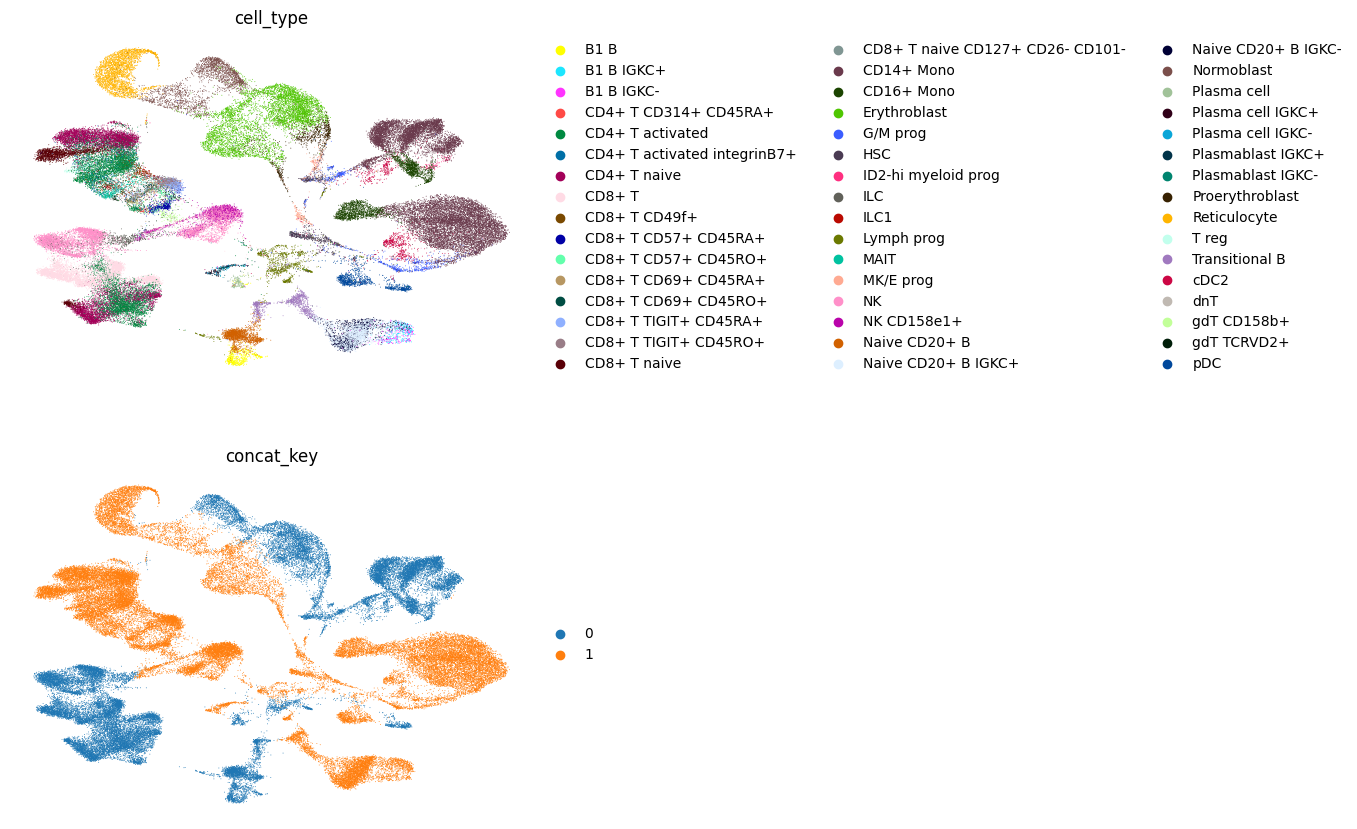

In [27]:
sc.pl.umap(rna, color=["cell_type", "concat_key"], ncols=1, frameon=False)

In [28]:
rna.X = rna.layers["counts"].copy()

## Preprocess ATAC

In [29]:
atac_multiom.X = atac_multiom.layers['counts'].copy()

In [30]:
atac_multiom.layers['tf-idf'] = atac_multiom.X.copy()

In [31]:
sc.pp.normalize_total(atac_multiom, target_sum=1e4)
sc.pp.log1p(atac_multiom)

In [32]:
sc.pp.highly_variable_genes(atac_multiom, n_top_genes=20000, batch_key='batch') #subset to top 20000 peaks

In [37]:
MultiMAP.TFIDF_LSI(atac_multiom) #Computes LSI based on a TF-IDF transformation of the data

In [38]:
sc.pp.neighbors(atac_multiom, use_rep="X_lsi", metric="cosine")
sc.tl.umap(atac_multiom)

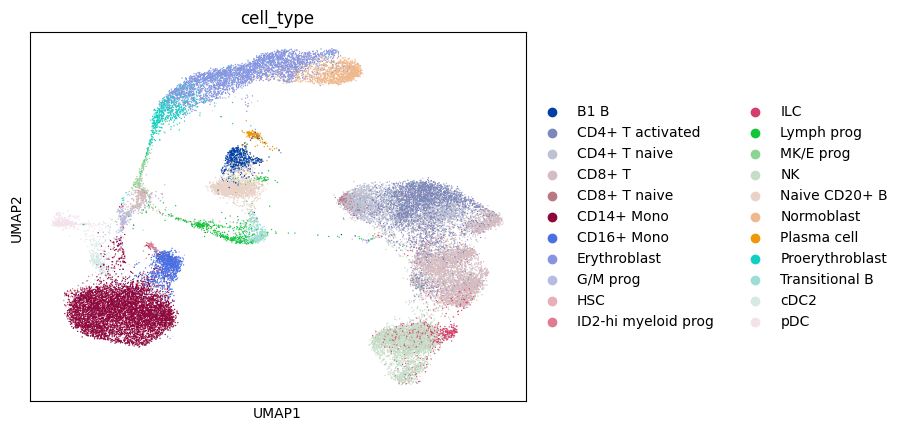

In [39]:
sc.pl.umap(atac_multiom, color="cell_type")

In [51]:
atac_X_lsi = atac_multiom.obsm['X_lsi'].copy()

In [ ]:
#run this only if problems arise while running the function piscanpy.tl.geneactivity
#corrected_index = []

# Verify and correct the format
#for i, value in enumerate(atac_multiom.var.index):
#    if "-" not in value:
        # Replace ":" with "-"
#        corrected_value = value.replace(":", "-")
#        print("Correcting format at index", i, "from", value, "to", corrected_value)
        # Add the corrected value to the list
#        corrected_index.append(corrected_value)
#    else:
        # If the format is already correct, add the value as-is
#        corrected_index.append(value)

# Assign the corrected index back to atac_multiom.var.index
#atac_multiom.var.index = corrected_index

In [60]:
atac_multiom.var.index

Index(['chr1-9776-10668', 'chr1-180726-181005', 'chr1-181117-181803',
       'chr1-191133-192055', 'chr1-267562-268456', 'chr1-629497-630394',
       'chr1-633515-634474', 'chr1-778276-779191', 'chr1-816868-817761',
       'chr1-822804-823597',
       ...
       'GL000195.1-137376-138301', 'GL000219.1-39933-40839',
       'GL000219.1-42172-43054', 'GL000219.1-44703-45584',
       'GL000219.1-45726-46450', 'GL000219.1-90062-90937',
       'GL000219.1-99257-100160', 'KI270726.1-27152-28034',
       'KI270713.1-21434-22336', 'KI270713.1-29629-30491'],
      dtype='object', length=116490)

In [61]:
# get atac_genes
atac_multiom.var.index = atac_multiom.var.index.map(lambda x: x.replace("-", ":", 1))
atac_multiom = episcanpy.tl.geneactivity(atac_multiom, gtf_file="gencode.v41.chr_patch_hapl_scaff.annotation.gtf")

In [63]:
atac_multiom.obsm['X_lsi'] = atac_X_lsi.copy()
del atac_X_lsi

In [65]:
# removing peaks that are mapped to the same gene. Duplicates will crash MultiMAP
atac_multiom = atac_multiom[:, ~atac_multiom.var.index.duplicated()]

In [67]:
atac_multiom.obs.Modality

TAGTTGTCACCCTCAC-1-s1d1    multiome
CTATGGCCATAACGGG-1-s1d1    multiome
CCGCACACAGGTTAAA-1-s1d1    multiome
TCATTTGGTAATGGAA-1-s1d1    multiome
ACCACATAGGTGTCCA-1-s1d1    multiome
                             ...   
TCGTGCTTCGTTACAA-6-s2d5    multiome
TGTGGAGCAGGTTAAA-6-s2d5    multiome
TTCGCAACATGATTGT-6-s2d5    multiome
AAGTAGCCATGTGGGA-6-s2d5    multiome
CTCACTCAGCCTTAAA-6-s2d5    multiome
Name: Modality, Length: 32469, dtype: category
Categories (1, object): ['multiome']

In [70]:
atac_multiom.obs.Modality = atac_multiom.obs.Modality.astype(str) + "_atac"
atac_multiom.obs.Modality = atac_multiom.obs.Modality.astype("category")

In [71]:
atac_multiom.obs.Modality

TAGTTGTCACCCTCAC-1-s1d1    multiome_atac
CTATGGCCATAACGGG-1-s1d1    multiome_atac
CCGCACACAGGTTAAA-1-s1d1    multiome_atac
TCATTTGGTAATGGAA-1-s1d1    multiome_atac
ACCACATAGGTGTCCA-1-s1d1    multiome_atac
                               ...      
TCGTGCTTCGTTACAA-6-s2d5    multiome_atac
TGTGGAGCAGGTTAAA-6-s2d5    multiome_atac
TTCGCAACATGATTGT-6-s2d5    multiome_atac
AAGTAGCCATGTGGGA-6-s2d5    multiome_atac
CTCACTCAGCCTTAAA-6-s2d5    multiome_atac
Name: Modality, Length: 32469, dtype: category
Categories (1, object): ['multiome_atac']

## Preprocess ADT

In [73]:
np.max(adt_cite.X)

7.7640185

In [74]:
sc.tl.pca(adt_cite, n_comps=100, svd_solver="auto")

In [81]:
adt_pca = adt_cite.copy()
sc.pp.scale(adt_pca)
sc.pp.pca(adt_pca)
adt_cite.obsm['X_pca'] = adt_pca.obsm['X_pca'].copy()
del adt_pca

In [82]:
adt_cite.obs.Modality = adt_cite.obs.Modality.astype(str) + "_adt"
adt_cite.obs.Modality = adt_cite.obs.Modality.astype("category")

In [83]:
adt_cite.obs.Modality

GCATTAGCATAAGCGG-1-s1d1    cite_adt
TACAGGTGTTAGAGTA-1-s1d1    cite_adt
AGGATCTAGGTCTACT-1-s1d1    cite_adt
GTAGAAAGTGACACAG-1-s1d1    cite_adt
TCCGAAAAGGATCATA-1-s1d1    cite_adt
                             ...   
TCCGGGAGTTGGGTTT-1-s2d5    cite_adt
TTGGATGAGGTGCCAA-1-s2d5    cite_adt
ACAGAAACACAGCGCT-1-s2d5    cite_adt
CACACAAGTCTAATCG-1-s2d5    cite_adt
GTCCACTAGCTACGTT-1-s2d5    cite_adt
Name: Modality, Length: 41482, dtype: category
Categories (1, object): ['cite_adt']

In [85]:
[rna.shape, atac_multiom.shape, adt_cite.shape]

[(73951, 12059), (32469, 31907), (41482, 134)]

In [86]:
rna.write_h5ad("rna_subset.h5ad")
adt_cite.write_h5ad("adt_subset.h5ad")

In [88]:
atac_multiom.X = csr_matrix(atac_multiom.X)

In [90]:
atac_multiom.write_h5ad("atac_subset.h5ad")

## Trimodal integration 

In [91]:
# trimodal integration 
adata = MultiMAP.Integration([rna, adt_cite, atac_multiom], ['X_pca', 'X_pca', 'X_lsi'])

In [92]:
adata.write_h5ad("multimap_trimodal_integrated.h5ad")

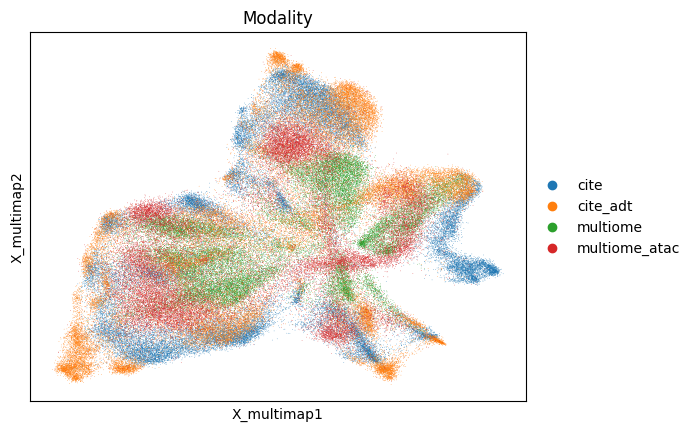

In [93]:
sc.pl.embedding(adata, 'X_multimap', color=["Modality"])

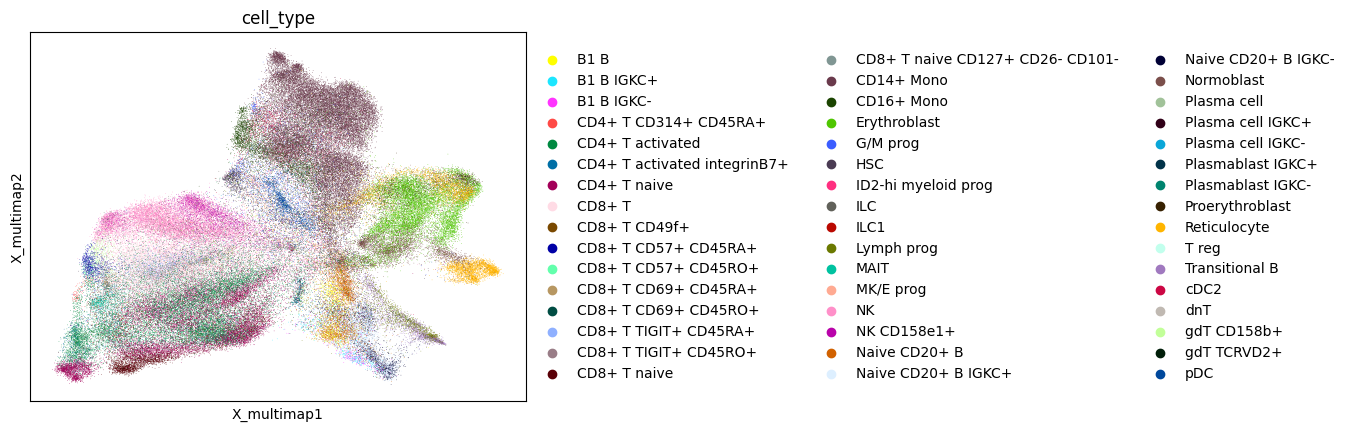

In [95]:
sc.pl.embedding(adata, 'X_multimap', color=['cell_type'])